In [49]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'README.md']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Data obtained from https://www.kaggle.com/khadeejahalghadeer/renewable-energy-generation-world-1965-to-2018
energy = pd.read_csv("modern-renewable-energy-consumption.csv")
energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# 1060 null in df
energy.isna().sum().sum()

1060

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
energy["Entity"].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Europe (other)', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East',
       'Morocco', 'Netherlands', 'New Zealand', 'North America', 'Norway',
       'Oman', 'Other Asia & Pacific', 'Other CIS', 'Other Caribbean',
       'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Po

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
energy["Entity"].value_counts()

Iceland                    54
Canada                     54
Singapore                  54
South & Central America    54
Israel                     54
                           ..
Azerbaijan                 34
Croatia                    29
Slovenia                   29
Macedonia                  29
USSR                       20
Name: Entity, Length: 100, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
energy["Year"].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
energy["Year"].value_counts()

2015    99
1998    99
1990    99
2011    99
2013    99
2009    99
2005    99
2001    99
1997    99
1993    99
2016    99
2012    99
2008    99
2004    99
2000    99
1996    99
1992    99
1994    99
2017    99
2002    99
2014    99
1991    99
2006    99
1995    99
1999    99
2003    99
2007    99
2018    99
2010    99
1988    96
1989    96
1985    96
1986    96
1987    96
1965    87
1984    87
1980    87
1976    87
1972    87
1983    87
1981    87
1969    87
1973    87
1977    87
1979    87
1975    87
1971    87
1967    87
1966    87
1970    87
1974    87
1978    87
1982    87
1968    87
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
us = energy[energy["Entity"] == "United States"]
us.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
4787,United States,USA,1965,198.974086,0.0,0.0,13.332232
4788,United States,USA,1966,199.936907,0.0,0.0,14.062007
4789,United States,USA,1967,227.220813,0.0,0.0,14.073571
4790,United States,USA,1968,228.154705,0.0,0.0,15.546045
4791,United States,USA,1969,256.028522,0.0,0.0,16.227060


<IPython.core.display.Javascript object>

In [42]:
us_1_half = us[us["Year"] < 1993]
us_1_half.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
4787,United States,USA,1965,198.974086,0.0,0.0,13.332232
4788,United States,USA,1966,199.936907,0.0,0.0,14.062007
4789,United States,USA,1967,227.220813,0.0,0.0,14.073571
4790,United States,USA,1968,228.154705,0.0,0.0,15.546045
4791,United States,USA,1969,256.028522,0.0,0.0,16.227060


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
us_2_half = us[us["Year"] >= 1993]
us_2_half.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
4815,United States,USA,1993,279.250945,0.475162,3.036189,66.924724
4816,United States,USA,1994,259.341321,0.501873,3.481928,66.354857
4817,United States,USA,1995,311.219815,0.514472,3.196215,63.265079
4818,United States,USA,1996,347.549480,0.541341,3.266736,64.825960
4819,United States,USA,1997,355.973121,0.532696,3.321247,65.820084


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DescribeResult(nobs=28, minmax=(198.97408585858398, 338.677631313127), mean=271.373147366519, variance=1261.3084909301847, skewness=-0.33696037480051527, kurtosis=-0.40911130820881914)
DescribeResult(nobs=26, minmax=(210.239999999997, 355.973121212117), mean=278.7983357420324, variance=1098.9049277300512, skewness=0.60306206286592, kurtosis=0.20165094203556677)


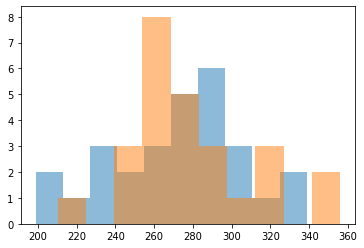

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
plt.hist(us_1_half["Hydropower (terawatt-hours)"], alpha=0.5)
plt.hist(us_2_half["Hydropower (terawatt-hours)"], alpha=0.5)
print(stats.describe(us_1_half["Hydropower (terawatt-hours)"]))
print(stats.describe(us_2_half["Hydropower (terawatt-hours)"]))

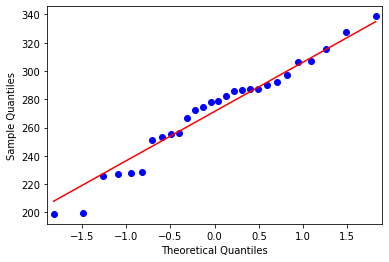

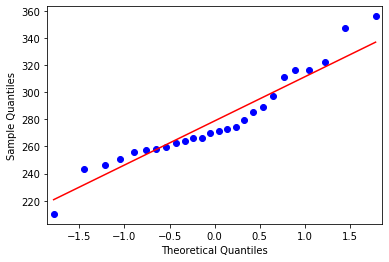

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
qqplot(us_1_half["Hydropower (terawatt-hours)"], line="s")
qqplot(us_2_half["Hydropower (terawatt-hours)"], line="s")
plt.show()

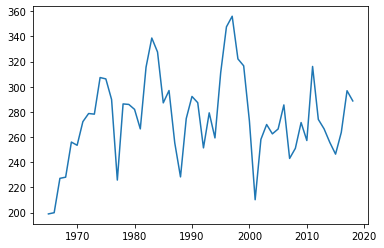

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
plt.plot(us["Year"], us["Hydropower (terawatt-hours)"])

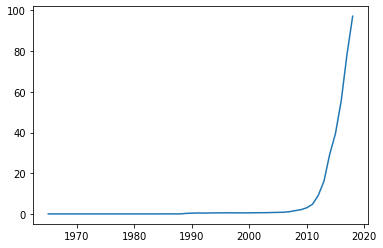

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
plt.plot(us["Year"], us["Solar (terawatt-hours)"])

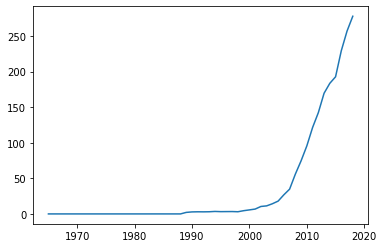

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
plt.plot(us["Year"], us["Wind (terawatt-hours)"])